# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 - Данные за 2016 год могут быть неполными.

**План и цели работы** 

[1. Открыть файл с данными и изучить общую информацию.](#section1)

[2. Подготовить данные.](#section2)

 - [Заменить названия столбцов (нижний регистр).](#section2.1)
 - [Преобразовать данные в нужные типы.](#section2.2)
 - [Обработайть пропуски.](#section2.3)
 - [Посчитайть суммарные продажи во всех регионах.](#section2.4)
 
[3. Провести исследовательский анализ данных.](#section3)

 - [Сколько игр выпускалось в разные годы.](#section3.1)
 - [Изменения продаж по платформам. Платформы с наибольшими суммарными продажами,](#section3.2) [распределение по годам по лидерам](#section3.3) [Срок появляются новых и исчезновение старых платформ.](#section3.2.1)
 - [Определение актуального периода для прогноза на 2017 год.](#section3.4)
 - [Динамика продаж в актуальное время.](#section3.4) [Выбор потенциально прибыльных платформ.](#section3.4.1)
 - [График «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#section3.5) [Результат.](#section3.5.1)
 - [Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.](#section3.6) [Диаграмма рассеяния и посчёт корреляции между отзывами и продажами.](#section3.6)[Вывод.](#section3.6.1)
 - [Продажами игр на других платформах.](#section3.7) [Вывод.](#section3.7.1)
 - [Игры по жанрам. Самые прибыльные жанры.](#section3.8) [Выделяются ли жанры с высокими и низкими продажами.](#section3.8.1)
 
[4. Портрет пользователя каждого региона (NA, EU, JP).](#section4.1)

 - [Самые популярные платформы (топ-5),](#section4.1) [различия в долях продаж.](#section4.1.1)
 - [Самые популярные жанры (топ-5),](#section4.2) [их разница.](#section4.2.1)
 - [Влияние рейтинга ESRB на продажи в отдельном регионе.](#section4.3)
 
[5. Проверка гипотез (пороговое значение alpha задано самостоятельно).](#section5)

 - [Критерий для приверки гипотез и причина.](#section5.0)
 - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#section5.1)
 - [Средние пользовательские рейтинги жанров Action и Sports разные.](#section5.2)
 
[6. Общий вывод.](#section6)

<a id='section1'></a>
## Изучение предоставленных данных 

In [1]:
# импорт библиотек необходимых в работе
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# сохраним датасет в переменную
games = pd.read_csv('/datasets/games.csv')

In [3]:
# визуально посмотрим на таблицу
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9560,Green Lantern: Rise of the Manhunters,X360,2011.0,Action,0.07,0.04,0.00,0.01,59.0,7.2,T
5290,Teenage Mutant Ninja Turtles: Smash-Up,Wii,2009.0,Fighting,0.33,0.00,0.00,0.03,67.0,8.2,E10+
5794,Star Wars Racer Revenge,PS2,2002.0,Racing,0.15,0.12,0.00,0.04,73.0,8.5,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
11336,Disney's Donald Duck: Goin' Quackers,PS2,2000.0,Platform,0.04,0.03,0.00,0.01,73.0,7.3,E
15355,XGRA: Extreme G Racing Association,GC,2003.0,Racing,0.02,0.00,0.00,0.00,69.0,7,T
13428,Hakuouki: Bakumatsu Musou Roku,PSP,2012.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
1954,Endless Ocean,Wii,2007.0,Adventure,0.43,0.46,0.09,0.09,72.0,8.1,E
4512,Mischief Makers,N64,1997.0,Platform,0.25,0.06,0.07,0.06,NaN,NaN,NaN


Названия столбцов для удобства стоит привести к нижнему регистру, имеются явные пропуски в данных, год продажи с правающей точкой - можно изменить на целое число для удобства визуального восприятия

Посмотрим **общую  информацию** о датафрейме

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 - преобразование необходимо только стобцу с оценкой пользователей игры (**user_score**)
 
**Пропуски**
 - Critic_Score - оценка критиков
 - User_Score - оценка пользователей
 - Rating - рейтинг от ESRB
 - Имеются так же пропуски в названии игр и жанре, всего 2
 
Предположу, что отсутствие оценок может быть связано с ранними выходами игр, например не было сервисов для сбора оценок, или не было организации ESRB, или было просто не принято оценивать
 - Year_of_Release - пропусков не много, средними или медианными значениями заполнить не получится, но они и не являются самыми важными для дальнейшего анализа и имеющихся будет достаточно, можно будет привести к целочисленному значению для удобства восприятия

In [5]:
# проверим, зависит ли наличие оценки от года выпуска игры
games.query('Critic_Score.isnull() & Rating.isnull() & User_Score.isnull()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как выяснилось, зависимости от оценок и раннего года выхода игры нет, заменить пропуски на среднее или медианное значение нельзя, так же как и на 0, потому как такой рейтинг возможен.

Столбцы **Critic_Score** и **User_Score** несут в себе информацию оценок от критиков и пользователей, их достаточно много, чтобы просто удалить, заменим пропуски на значение -1, в качестве 'заглушки' и при анализе или рассчетах будем просто исключать их.

Пропуски в столбце **Rating** - посчитать среднее значение игр того же жанра нельзя, заменю пропуски на значение 'no rating', чтоб пропусков просто не было

<a id='section2'></a>
## Подготовка данных

<a id='section2.1'></a>
### Замена регистра столбцов

In [6]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [7]:
# проверим
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='section2.2'></a>
### Преобразование данных в нужный тип

**user_score** - челочисленный показатель, при этом имеет тип данных **objekt** - изменим на **float**

In [8]:
# посмотрим какие уникальные значения хранятся в столбце user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди числовых значений, имеются как пропуски так и ячейки со значением 'tbd', посмотрим сколько таковых

In [9]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Из открытых источников в интернете было выявленно, что оценка 'tbd' ставится, когда продукт (фильм, игра, телешоу и прочее) получил недостаточное кол-во голосов (менее 4) для подсчета рейтинга для его публикации. Дословно аббревиатура '**tbd**' расшифровывается как **To Be Determined** или будет определенно. 

Так как числовой тип данных необходим, и фактически 'tbd' - это тот же 'NaN', изменим его на 'NaN' и приведём столбец к числовому значению

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

<a id='section2.3'></a>
### Обработка пропусков

Пропуски в **critic_score** и **user_score** заменим на -1

In [11]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [12]:
# проверим результать
print(f'Количество пропусков в critic_score - {games["critic_score"].isnull().sum()}')
print(f'Количество пропусков в user_score - {games["user_score"].isnull().sum()}')

Количество пропусков в critic_score - 0
Количество пропусков в user_score - 0


Заменим пропуски в столбце **rating** на 'no rating'

In [13]:
games['rating'] = games['rating'].fillna('no rating')

Cтолбец **year_of_release** - можно было бы сравнить названия игр которые вышли, и тех, где пропуски, и поставить соответствующий год, но выход игры одной и той же игры на разных платформах может отличатся и в насколько лет, либо релиз может быть отменён вовсе, по этому, что бы пропусков не оставалось, произведём же тот же приём с 'заглушкой'.

In [14]:
games['year_of_release'] = games['year_of_release'].fillna('2084')

In [15]:
# и приведём к целочисленному значению
games['year_of_release'] = games['year_of_release'].astype('int')

Пропуски в **name** и **genre**

In [16]:
# посмотрим на такие
games.query('name.isnull() & genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,no rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,no rating


Обе игры практически прородители, без названия, без оценок, без рейтинга, без жанра. В следствии их количесва, всего две, и года их релиза, 1993, их отсутствие не повлияет на последующий анализ, по этому просто удалим.

In [17]:
games.dropna(subset = ['name'], inplace = True)
games.reset_index(inplace = True, drop = True)

Проверим на всякий случай явные дубликаты, и посмотрим результат по пропускам

In [18]:
print(f'Кол-во дубликатов: {games.duplicated().sum()}')

Кол-во дубликатов: 0


In [19]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<a id='section2.4'></a>
### Сумарные продажи в регионах

In [20]:
# создадим отдельный столбец с суммой всех продаж
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [21]:
# посмотрим результат
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
789,Battlefield: Hardline,PS4,2015,Shooter,0.71,0.94,0.14,0.32,73.0,5.0,M,2.11
16011,Dead Rising 2,XOne,2016,Action,0.01,0.00,0.00,0.00,-1.0,-1.0,M,0.01
10266,Hole in the Wall: Deluxe Edition,X360,2011,Misc,0.10,0.00,0.00,0.01,-1.0,-1.0,E,0.11
12752,Zero Divide,PS,1995,Fighting,0.03,0.02,0.00,0.00,-1.0,-1.0,no rating,0.05
16103,Cosmetic Paradise: Make no Kiseki,DS,2008,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no rating,0.01
14369,Smart Girl's Winter Wonderland,DS,2008,Misc,0.03,0.00,0.00,0.00,-1.0,-1.0,E,0.03
15893,Pro Rally,GC,2002,Racing,0.01,0.00,0.00,0.00,64.0,-1.0,E,0.01
11592,Evolution Worlds,GC,2002,Role-Playing,0.06,0.02,0.00,0.00,63.0,8.0,E,0.08
16114,Rengoku II: The Stairway to H.E.A.V.E.N. (jp s...,PSP,2006,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no rating,0.01
5769,Clash of the Titans,PS3,2010,Action,0.09,0.15,0.01,0.05,41.0,1.7,T,0.30


<a id='section3'></a>
## Исследовательский анализ данных

<a id='section3.1'></a>
### Количество выпущенных игр по годам

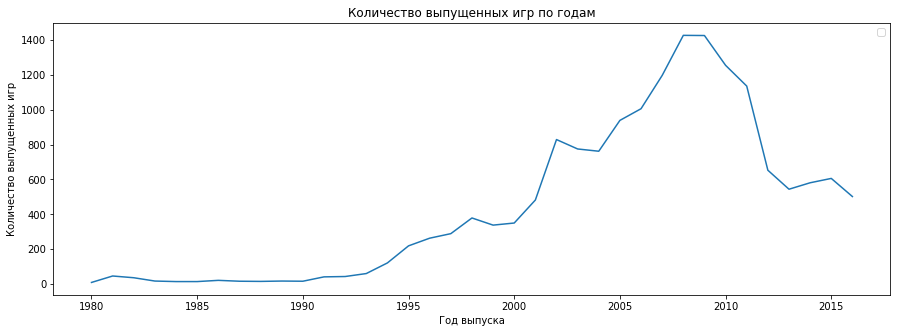

In [22]:
years_games = games.pivot_table(index = games[games['year_of_release'] != 2084]['year_of_release'], 
                                   values = 'name', aggfunc = 'count').copy()
plt.figure(figsize = (15,5))
sns.lineplot(data = years_games)
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

**Вывод:**

Из графика можно сделать вывод, что кол-во игр на игровый приставках и комьютерах начало возрастать после 90-х годов, прогресс не стоял на месте, мощности увеличивались, росла популрность игр в целом, резкий скачёк наблюдается после 2002 года. Пиком можно считать 2008-2009 года, после идёт спад. Связан может быть как и началом популярности и мобильных игр, и развития социальных сетей, предположу, что связь может быть связана и с прогрессом, когда на создание игр на игровые приставки и пк стало занимать больше времени из-за больших требований уже самих пользователей например к графике.

<a id='section3.2'></a>
### Количество выпущенных игр по платформам

Построим график для отображения популярных платформ по продажам

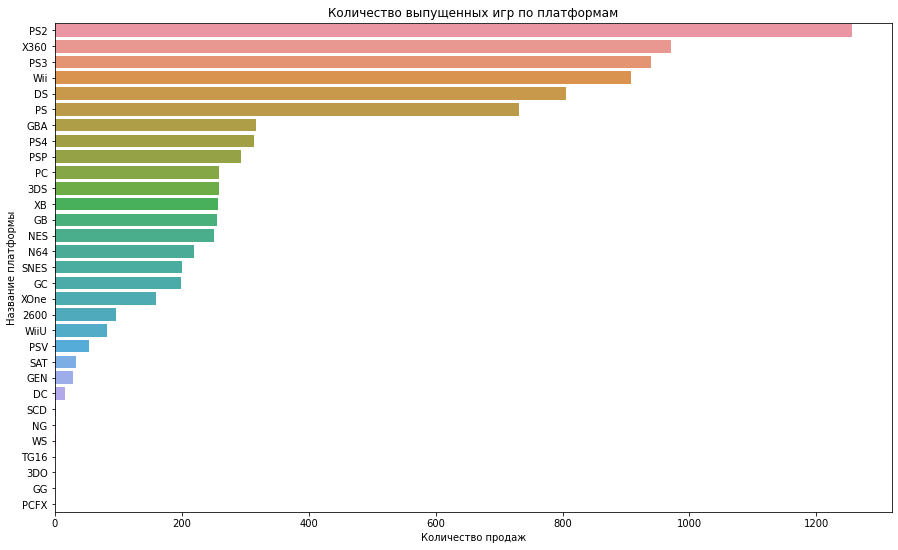

In [23]:
platform_sales = games.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).copy()

plt.figure(figsize = (15,9))
sns.barplot(y = platform_sales.index, x = platform_sales['total_sales'])
plt.title("Количество выпущенных игр по платформам")
plt.xlabel("Количество продаж")
plt.ylabel("Название платформы")
plt.show()

Явными лидерами являются PS2, X360, PS3, WII, DS, PS

<a id='section3.3'></a>
### Динамики продаж по годам по лидерам

In [24]:
# сохраним платформы отдельно
top_platform = (games[((games['platform'] == 'PS2') | (games['platform'] == 'X360') | (games['platform'] == 'PS3') 
               | (games['platform'] == 'Wii') | (games['platform'] == 'DS') | (games['platform'] == 'PS'))
                   & (games['year_of_release'] != 2084)]).copy()

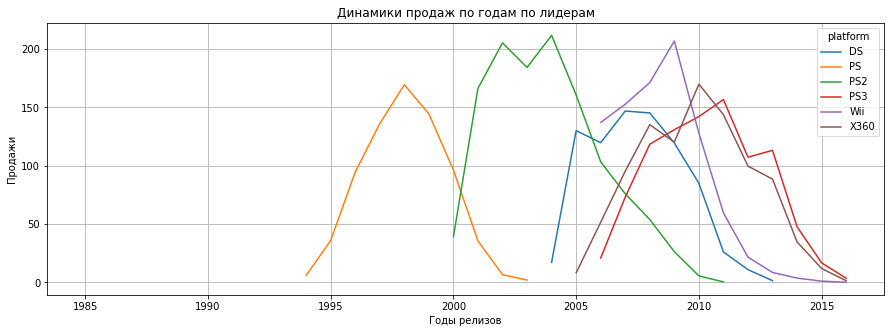

In [25]:
# построим график "жизни" топовых платформ
pd.pivot_table(top_platform, index = 'year_of_release', columns = 'platform', values = 'total_sales', 
               aggfunc = 'sum').plot(figsize=(15, 5))
plt.grid(True)
plt.title('Динамики продаж по годам по лидерам')
plt.xlabel('Годы релизов')
plt.ylabel('Продажи')
plt.show()

<a id='section3.2.1'></a>
**Вывод:**

- PS - с 1994 до 2003, 10 лет
- PS2 - с 2000 до 2011 - 11 лет
- PS3 - с 2006 по настоящее время, но сильно спад после 2013 года выхода PS4 вероятно 
- DS - с 2004 рост популярности, пик в 2008, конец срока службы - 2013 год - 8 лет
- Wii - с 2006 по настоящее время, но в 2016 уже почти нет прибыли - 10 лет
- Х360 - с 2005 по настоящее, рост первые 5 лет и дальнейший спад - 10 лет

Таким образом, в среднем игровые консоли существуют 10 лет. Пик, практически для каждой, наступает через 5 лет от начала существования, далее идёт спад.

<a id='section3.4'></a>
### Динамика продаж в актуальное время

<a id='section3.3'></a>
По моему мнению, таким периодом можно считать с 2011 года по 2016, потому как в этот период актуальные лидеры прошлых лет начинают сдавать позиции, на место которых приходят консоли нового поколения, чей жизненный цикл только начинает перспективу для развития, в качестве альтернативы устаревшим консолям.

Построим график с динамикой продаж по актуальным годам, для выявления лидеров

In [26]:
# сохраним отдельно актуальные платформы с 2011 года
platform_2011 = (games[(games['year_of_release'] > 2011)
                   & (games['year_of_release'] != 2084)]).copy()

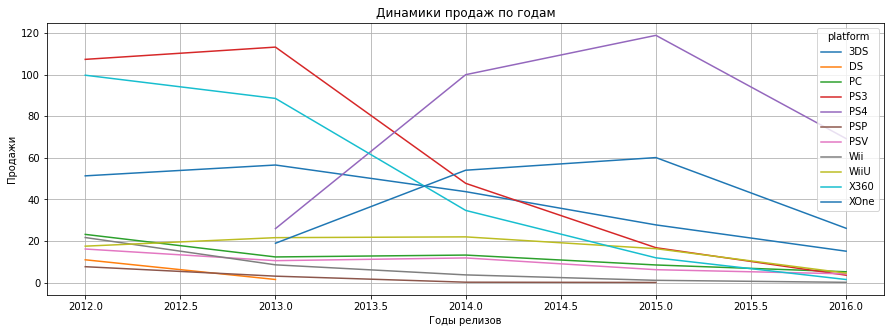

In [27]:
#  построим график
pd.pivot_table(platform_2011, index = 'year_of_release', columns = 'platform', values = 'total_sales', 
               aggfunc = 'sum').plot(figsize=(15, 5))
plt.grid(True)
plt.title('Динамики продаж по годам')
plt.xlabel('Годы релизов')
plt.ylabel('Продажи')
plt.show()

Посмотрим еще раз на лидеров продаж уже в актуальном периоде для выявления перспективных платформ.

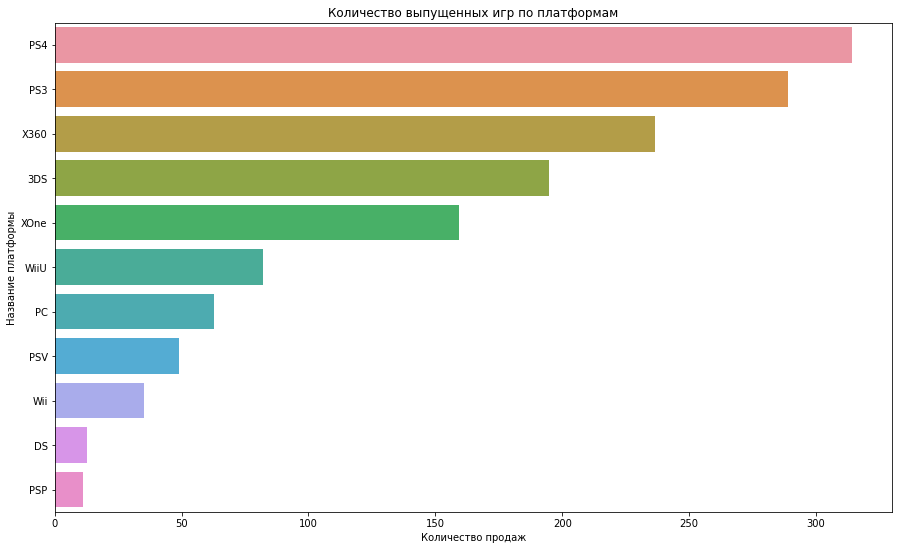

In [28]:
platform_sales_2011 = platform_2011.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).copy()

plt.figure(figsize = (15,9))
sns.barplot(y = platform_sales_2011.index, x = platform_sales_2011['total_sales'])
plt.title("Количество выпущенных игр по платформам")
plt.xlabel("Количество продаж")
plt.ylabel("Название платформы")
plt.show()

<a id='section3.4.1'></a>
Многие популярные платформы прошли свой цикл развития в 10 лет, и заметен их явный спад в продажах, во все эти платформы владываться не стоит, жизненный их цикл практически окончен.

Хоть и в лидерах по продажам находятся PS3 и X360, очевидно, что их место займут консоли нового поколения.

PS4 и XOne имеют тенденцию к спаду, но стоит учесть, что цикл их существования еще не дошел до середины, поэтому логично будет развивать их, на данный момент они являются одними из перспективных.

Так же есть еще 3 платформы, которые появились относительно недавно, и имеют перспективы роста (WiiU - 2012, PSV - 2011, 3DS - 2011).

Не менее значимой платформой является PC, существует долго и стабильно, актуальность компьютера будет всегда.

**Вывод:** в список *потенциально прибыльных* платформ стоит отнести следующие *'PS4', 'XOne', 'WiiU', 'PSV', '3DS'* и несомненно актуальную на всё время *'PC'*.

<a id='section3.5'></a>
###  «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Сохраним топ 6 потенциальных платформ

In [29]:
# создадим список этих платформ, который будет необходим
top6 = ['PS4','XOne','WiiU','PSV','3DS', 'PC']
# сохраним топ платформы в отдельной переменной без выбросов
top6_platforms = platform_2011[platform_2011['platform'].isin(top6)].copy()
top6_platforms = top6_platforms[top6_platforms['total_sales'] < 1.4]

In [30]:
top6_platforms['total_sales'].describe()

count    1695.000000
mean        0.211776
std         0.279394
min         0.010000
25%         0.030000
50%         0.090000
75%         0.270000
max         1.390000
Name: total_sales, dtype: float64

<a id='section3.5.1'></a>
"**Ящик с усами**"

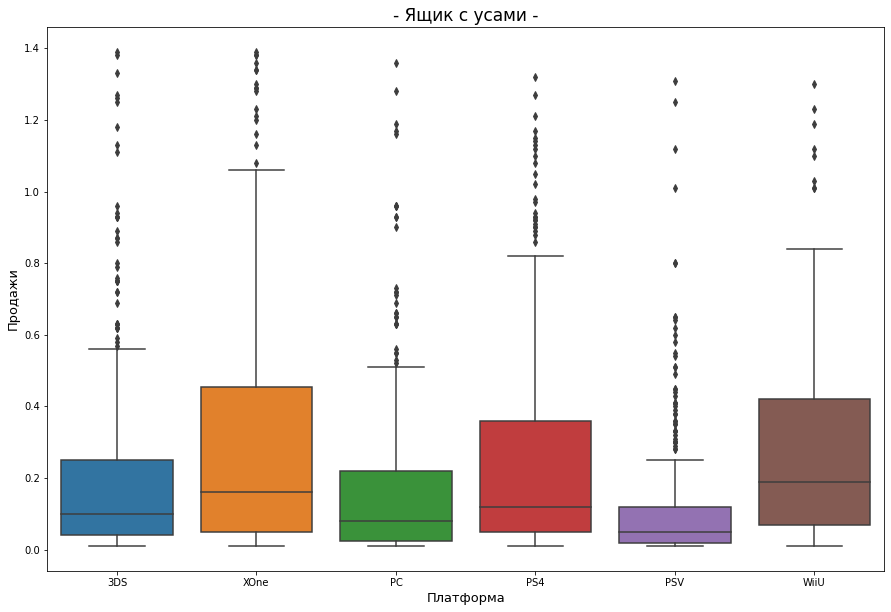

In [31]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = top6_platforms, x = 'platform', y = 'total_sales')
plt.title('- Ящик с усами -', fontsize = 17)
plt.xlabel('Платформа', fontsize = 13)
plt.ylabel('Продажи',fontsize = 13)
plt.show()

**Вывод:**

- Исходя из графиков видно, что медиана протекает у всех по разному
- Больше всех продаж у XOne, затем WiiU, после PS4, 3DS, PC и PSV на последнем месте, где медиана < 0.1 млн, а верхняя граница чуть превышает 0.2
- При этом, каждая платформа имеет вбросы в виде игр, которые приносили гораздо большую прибыль, чем их средние значения

<a id='section3.6'></a>
### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

Возмем для примера долгоживующую платформу и имеющую постоянную аудиторию - 'PC'

**Построим диаграмму рассеяния зависимости продаж от отзывов пользователей**

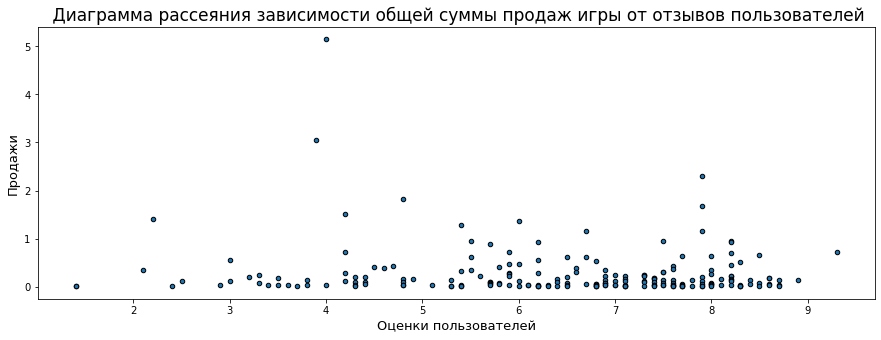

Коэффициент зависимости продаж от оценок пользователей = -0.12186747630735577


In [32]:
# используем актуальный период для анализа
# т.к. возможно присутствие игр, чей релиз так и не состоялся с 2011 по 2016 год
pc = platform_2011[(platform_2011['platform'] == 'PC') & (platform_2011['user_score'] >= 0)]
pc.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', ec = 'black', figsize = (15,5))
plt.title(' Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов пользователей', fontsize = 17)
plt.xlabel('Оценки пользователей', fontsize = 13)
plt.ylabel('Продажи',fontsize = 13)
plt.show()

print('Коэффициент зависимости продаж от оценок пользователей =' , pc['user_score'].corr(pc['total_sales']))

**Построим диаграмму рассеяния зависимости продаж от отзывов критиков**

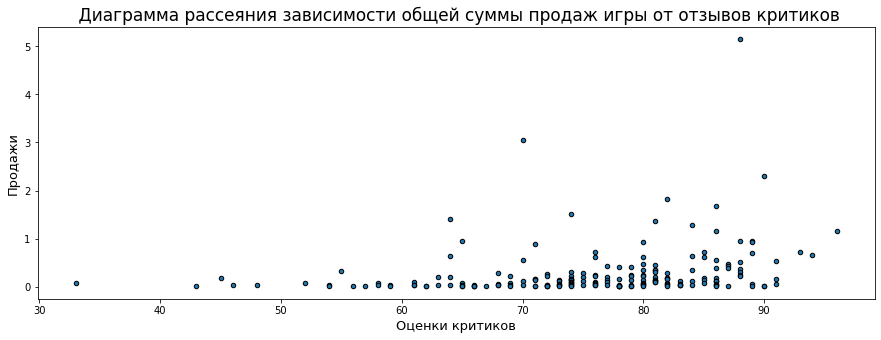

Коэффициент зависимости продаж от оценок критиков = 0.23724324311567915


In [33]:
pc = platform_2011[(platform_2011['platform'] == 'PC') & (platform_2011['critic_score'] >= 0)]
pc.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', ec = 'black', figsize = (15,5))
plt.title(' Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков', fontsize = 17)
plt.xlabel('Оценки критиков', fontsize = 13)
plt.ylabel('Продажи',fontsize = 13)
plt.show()

print('Коэффициент зависимости продаж от оценок критиков =' , pc['critic_score'].corr(pc['total_sales']))

<a id='section3.6.1'></a>
**Вывод:**

По платформе PC можно сказать следующее, относительно отзывов критиков и пользователей к продажам в целом: 
 - Отзывы критиков хоть и важный элемент, но зависимость продаж от них крайне низкая. Безусловно высокие оценки критиков могут привести к взлёту продаж определенной игры, но это скорее можно назвать случайностью.
 - Зависимость между отзывами пользователей и продажами крайне низкая, такое может быть связано с тем, что игроки оставляют отзыв уже после приобретения продукта, и приобретают как раз его, на первоначальной оценки критиков.

<a id='section3.7'></a>
### Продажи игр на других популярных платформах платформах

In [34]:
# уберем платформу PC, т.к. выше по ней делал зависимость оценок от продаж
top6.remove('PC')

In [35]:
def other_platform(name_platform):
    platform = platform_2011[(platform_2011['platform'] == name_platform) 
                             & (platform_2011['user_score'] >= 0) & (platform_2011['critic_score'] >= 0)]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    platform.plot(kind = 'scatter', x = 'user_score' , y = 'total_sales', ec = 'red', ax = ax[0])
    platform.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', ec = 'red', ax = ax[1])
    fig.suptitle(name_platform, fontsize = 13)
    ax[0].set(xlabel = 'Оценка пользователей')
    ax[1].set(xlabel = 'Оценка критиков')
    ax[0].set(ylabel = 'Продажи')
    ax[1].set(ylabel = 'Продажи')
    plt.show()
    
    user_grade = platform['user_score'].corr(platform['total_sales'])
    critic_grade = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= user_grade:
        print('Коэффициент зависимости продаж от оценок пользователей ', name_platform, ': очень слабая', user_grade)
    if 0.5 >= user_grade >= 0.3:
        print('Коэффициент зависимости продаж от оценок пользователей ', name_platform, ': слабая', user_grade)
    if 0.7 >= user_grade >= 0.5:
        print('Коэффициент зависимости продаж от оценок пользователей ', name_platform, ': средняя', user_grade)
    if 0.9 >= user_grade >= 0.7:
        print('Коэффициент зависимости продаж от оценок пользователей ', name_platform, ': высокая', user_grade)
    if 1 >= user_grade >= 0.9:
        print('Коэффициент зависимости продаж от оценок пользователей ', name_platform, ': очень высокая', user_grade)
    
    if 0.3 >= critic_grade:
        print('Коэффициент зависимости продаж от оценок критиков ', name_platform, ': очень слабая', critic_grade)
    if 0.5 >= critic_grade >= 0.3:
        print('Коэффициент зависимости продаж от оценок критиков ', name_platform, ': слабая', critic_grade)
    if 0.7 >= critic_grade >= 0.5:
        print('Коэффициент зависимости продаж от оценок критиков ', name_platform, ': средняя', critic_grade)
    if 0.9 >= critic_grade >= 0.7:
        print('Коэффициент зависимости продаж от оценок критиков ', name_platform, ': высокая', critic_grade)
    if 1 >= critic_grade >= 0.9:
        print('Коэффициент зависимости продаж от оценок критиков ', name_platform, ': очень высокая', critic_grade)
        
    print('\n')

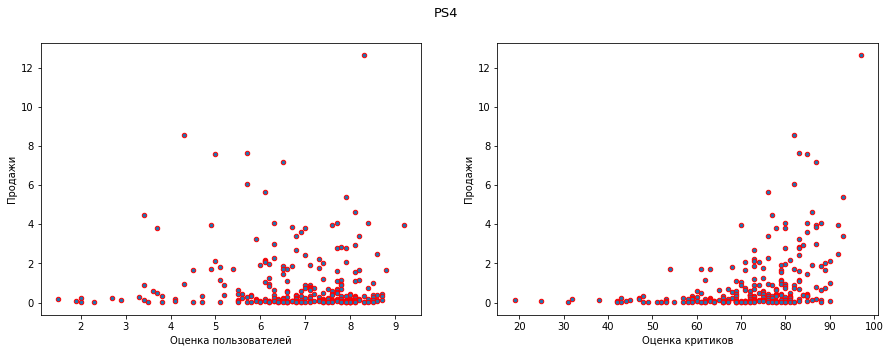

Коэффициент зависимости продаж от оценок пользователей  PS4 : очень слабая -0.03362497596528878
Коэффициент зависимости продаж от оценок критиков  PS4 : слабая 0.40589480145836687




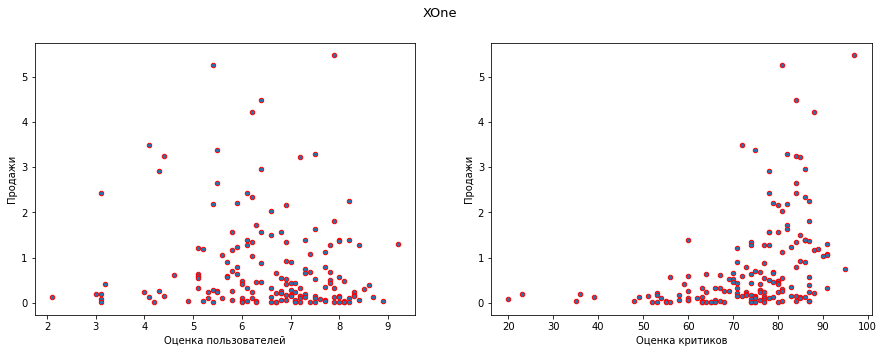

Коэффициент зависимости продаж от оценок пользователей  XOne : очень слабая -0.09400318326920852
Коэффициент зависимости продаж от оценок критиков  XOne : слабая 0.41042203561296375




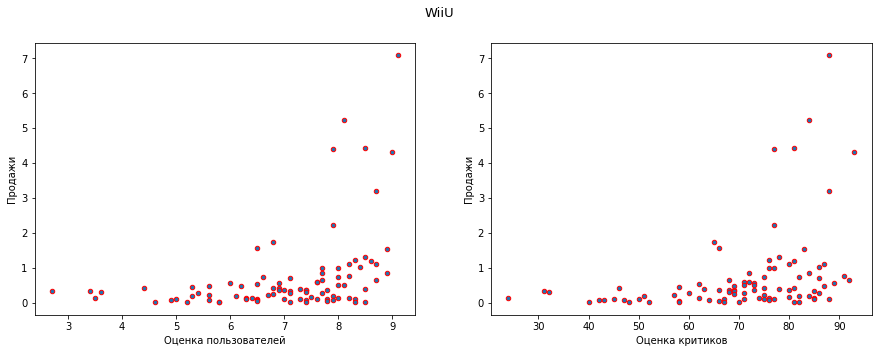

Коэффициент зависимости продаж от оценок пользователей  WiiU : слабая 0.3918479505297129
Коэффициент зависимости продаж от оценок критиков  WiiU : слабая 0.350882422488643




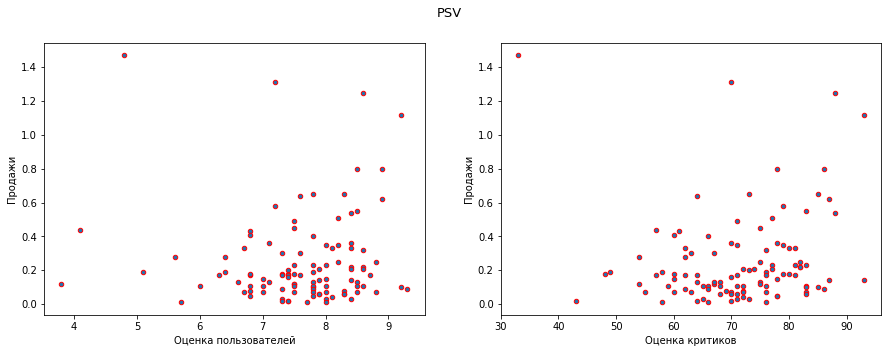

Коэффициент зависимости продаж от оценок пользователей  PSV : очень слабая 0.013902409906331152
Коэффициент зависимости продаж от оценок критиков  PSV : очень слабая 0.09398804100946612




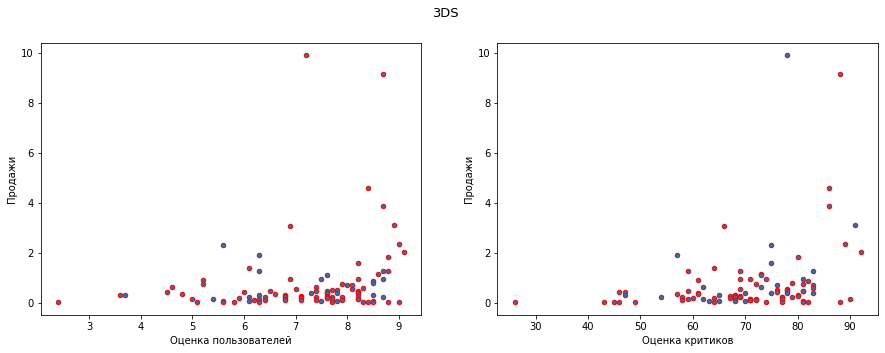

Коэффициент зависимости продаж от оценок пользователей  3DS : очень слабая 0.20181255007655283
Коэффициент зависимости продаж от оценок критиков  3DS : слабая 0.31055301915326294




In [36]:
for platform in top6:
    other_platform(platform)

<a id='section3.7.1'></a>
**Вывод:**

- оценки пользователей не влияют на общие продажи игр. Пользователи могут больше прислушиваться к оценкам критикам чем к своим же коллегам по играм, так же отзывы они могут оставлять уже после приобретения игры, а значит прибыль они уже принесли.
- оценки критиков имеют свой вес, но возможно только на первоначальном этапе, на этапе рекламы и предстоящего релиза. 

<a id='section3.8'></a>
### Игры по жарнам

In [37]:
# выведем жанры и их продажи в актуальном периоде определённом ранее
games_genre = (platform_2011.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})
                   .sort_values(by='total_sales', ascending = False)).copy()
                   
games_genre = games_genre.rename(columns={'name':'name_count'})
#games_genre = games_genre.reset_index()

#games_genre.set_index('genre', inplace=True)
games_genre

,total_sales,name_count
genre,,
Action,441.12,1031
Shooter,304.73,235
Role-Playing,192.80,370
Sports,181.07,268
Misc,85.04,192
Platform,61.00,85
Racing,53.50,115
Fighting,44.49,109
Simulation,35.12,80


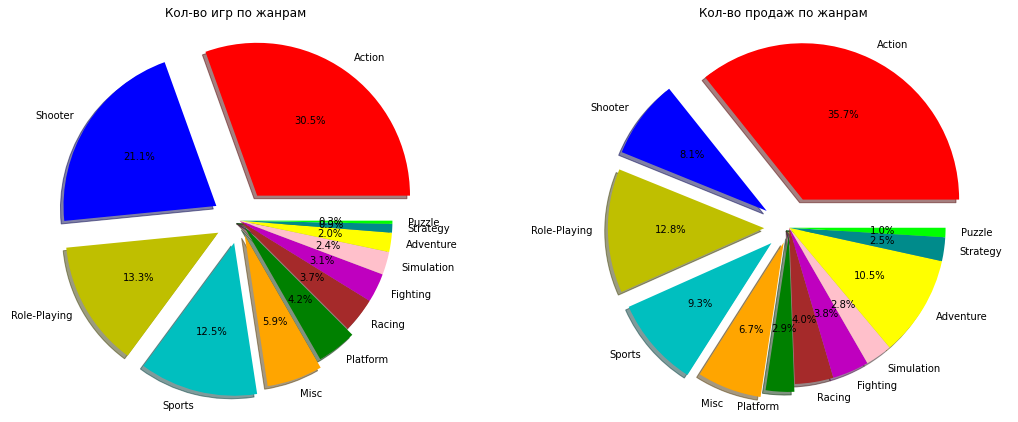

In [38]:
color = ['r', 'b', 'y', 'c', 'orange', 'green', 'brown', 'm', 'pink', 'yellow', 'darkcyan', 'lime'] 

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
fig.autofmt_xdate();


labels1 = games_genre['total_sales'].index
sizes1 = games_genre['total_sales'].values

labels2 = games_genre['name_count'].index
sizes2 = games_genre['name_count'].values
explode = (0.2, 0.18, 0.16, 0.15, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
ax1.set_title('Кол-во игр по жанрам')
ax1.pie(sizes1, labels = labels1, autopct = '%1.1f%%',
        shadow = True, explode = explode, startangle = 0, colors = color) #, colors=plt.cm.Dark2.colors 
ax1.axis('equal') 

ax2.set_title('Кол-во продаж по жанрам')
ax2.pie(sizes2, labels = labels2, autopct = '%1.1f%%',
        shadow = True, explode = explode,startangle = 0, colors = color) 
ax2.axis('equal')

plt.show()

In [39]:
# найдём средние значения продаж по жанрам
games_genre_mean = (platform_2011.groupby(['genre']).agg({'total_sales':'mean'})
                   .sort_values(by='total_sales', ascending = False))
games_genre_mean = games_genre_mean.rename(columns={'total_sales':'mean'})
# найдём медианные значения продаж по жанрам, т.к. имеются вбросы в виде отдельных игр, 
#которые принесли максимальные значения в выруке
games_genre_median = (platform_2011.groupby(['genre']).agg({'total_sales':'median'})
                   .sort_values(by='total_sales', ascending = False))
games_genre_median = games_genre_median.rename(columns={'total_sales':'median'})
# объеденим в одну таблицу
mean_median = games_genre_mean.merge(games_genre_median, on=['genre'], how='outer')
mean_median

,mean,median
genre,,
Shooter,1.296723,0.440
Platform,0.717647,0.210
Sports,0.675634,0.240
Role-Playing,0.521081,0.140
Racing,0.465217,0.140
Misc,0.442917,0.120
Simulation,0.439000,0.120
Action,0.427856,0.120
Fighting,0.408165,0.130


<a id='section3.8.1'></a>
**Вывод:**

Больше всего игр жанра 'Action', так же и выручку они приносят больше всего платформам, но при этом выручка не соизмерима с кол-вом выпущенных игр, как например у жанра 'Shooter', чье производство естстественно более сложный и затратный процесс, при этом соотвественно труд окупается. Так же обстоят дела и с 'Adventure', приключениями, доля игр которых юолее 10% от всех, а средние продажи достаточно на низком уровне. Спрос на активный гейплей рождает соответствующее предложение, аутсайдерами можно назвать игры требующих усидчивости и мозговой активности ('Strategy' и 'Puzzle').	

<a id='section4'></a>
## Портрет пользователя каждого региона (NA, EU, JP)

<a id='section4.1'></a>
### Самые популярные платформы (топ-5)

In [40]:
# оставим только популярные платформы
# и посмотрим их долю в каждом регионе
platform_2017 = platform_2011.loc[platform_2011['platform'].isin(['PS4','XOne','WiiU','PSV','3DS', 'PC'])]

Создадим словарь с топ-5 платформами по продажам и посмотрим на графике долю каждого в отдельном регионе

In [41]:
# сохраним популярные платформы в отдельных списках с их прибылью в регионах
popular_gaming_platform = {}

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popular_gaming_platform[region] = platform_2017.groupby('platform')[region].sum().sort_values(ascending = False)
    
popular_gaming_platform

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 3DS      55.31
 WiiU     38.10
 PC       19.12
 PSV      10.98
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 XOne     51.59
 3DS      42.64
 PC       37.76
 WiiU     25.13
 PSV      11.36
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     87.79
 PSV     21.04
 PS4     15.96
 WiiU    13.01
 XOne     0.34
 PC       0.00
 Name: jp_sales, dtype: float64}

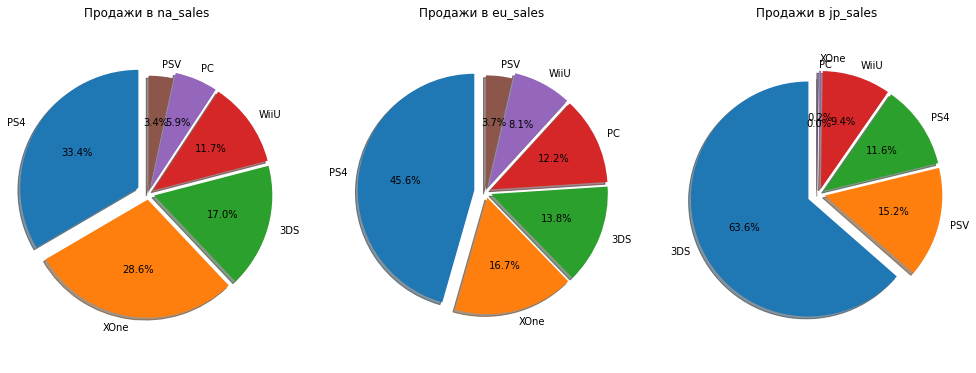

In [42]:
# посмотрим распределение на графике

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 7))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.00)

for i in [0,1,2]:
    labels = popular_gaming_platform[region[i]].index
    sizes = popular_gaming_platform[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, explode = explode, startangle = 90) 
    ax.axis('equal')  

plt.show()
# ['PS4','XOne','WiiU','PSV','3DS', 'PC']

<a id='section4.1.1'></a>
**Вывод:**

Пользователи в Америке предпочитают в большей степени PlayStation, не малое количество и поклоников Xbox, больше половины предпочитают именно эти платформы, в Европе почти половина играет на PlayStation, и в меньшей степени Xbox, у Nintendo так же есть свои поклоники, но не на столько, как в Японии, где она в явных лидерах, и занимает больше 60% всех продаж, игроки Японии явно уделяют внимание своему отечественному производителю и почти не играют на компьютерах. PC вошел в топ 5 только в Европе, железо пк обновляется, но платформа остаётся не изменной, да игры стоят значительно дешевле, в то время, как консоли каждый раз меняют срок своей актуальности, и игрокам приходится их обновлять, чтоб была возможность играть в новые игры. Так же вопрос с пиратством, где на PC вопрос обстоит сложно, и пользователям не обязательно покупать игры, в то время как на консолях игры и стоят гораздо дороже, и просто скачивать игры не удаётся.


<a id='section4.2'></a>
### Самые популярные жанры (топ-5)

По аналогии с платформами, сохраним топ 5 в словаре и посмотрим результат на графике

In [43]:
# сохраним топ-5 жанров в словаре
popular_gaming_genre = {}

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popular_gaming_genre[region] = platform_2011.groupby('genre')[region].sum().sort_values(ascending=False).head(5).copy()
    
popular_gaming_genre

{'na_sales': genre
 Action          177.84
 Shooter         144.77
 Sports           81.53
 Role-Playing     64.00
 Misc             38.19
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          159.34
 Shooter         113.47
 Sports           69.09
 Role-Playing     48.53
 Racing           27.29
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    65.44
 Action          52.80
 Misc            12.86
 Simulation      10.41
 Fighting         9.44
 Name: jp_sales, dtype: float64}

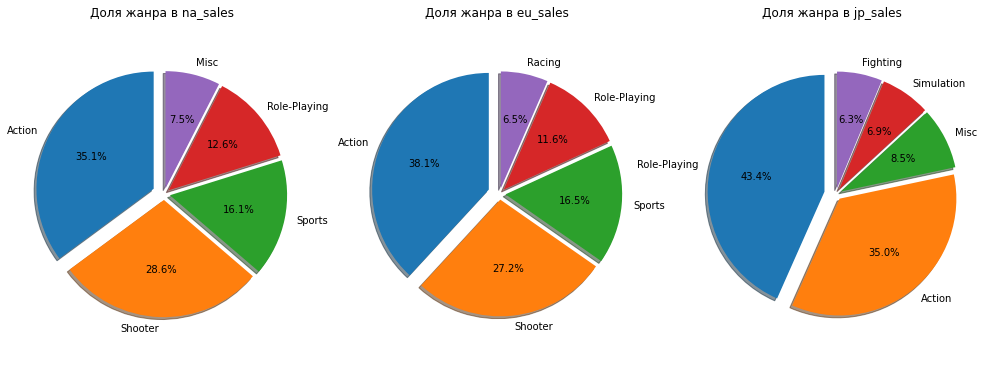

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 7))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.1, 0.05, 0.05, 0.05, 0.05)

for i in [0,1,2]:
    labels = popular_gaming_genre[region[i]].index
    sizes = popular_gaming_genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Доля жанра в {region[i]}')
    ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, explode = explode, startangle = 90) 
    ax.axis('equal')  

plt.show()

<a id='section4.2.1'></a>
**Вывод:**

Европа и Америка в игровых предпочтениях имеет много общего в целом, жанры в большей степени совпадают, топ-3 жанра в обоих регионах занимаю *Action, Sports, Shooter*. Япония - это другая культура как игровой сигмент Азии в принципе, соответственно предпочтения иные, жанр *Action* присутствует в топ-3 жанров и соседствует с жанром *Misc*, но лидором в регионе является *Role-Playing*.

<a id='section4.3'></a>
### Влияние рейтинга ESRB на продажи в регионе

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

In [45]:
# создадим таблицу, с общими продажи в зависимости от рейтинга 
# из-за принадлежности рейтинга к США и Канаде сортировка соответственно по 'na_sales' 
esrb = platform_2011.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by = 'na_sales', 
                                                                                     ascending = False)#.reset_index().copy()
#esrb.set_index('rating', inplace=True)
esrb

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
E,114.37,113.03,28.33
no rating,103.31,91.50,108.84
E10+,75.70,55.37,8.19
T,66.02,52.96,26.02


- «**E**» («*Everyone*») — Для всех
- «**T**» («*Teen*») — Подросткам
- «**M**» («*Mature*») — Для взрослых
- «**E10+**» («*Everyone 10 and older*») — Для всех от 10 лет и старше
- «**EC**» («*Early childhood*») — Для детей младшего возраста
- «**AO**» («*Adults Only 18+*») — Только для взрослых
- «**RP**» («*Rating Pending*») — Рейтинг ожидается

**Вывод:**

Влияние рейтинга *ESRB* будет существенным наверно только в Америке, потому как там на него будут ориентироваться и критики и пользователи. "Игры для взрослых" приносят большую прибыль как в Америке, так и в Европе, естественно в этом есть и свой интерес, и аудитория таких игр более финансово независима, после по общей прибыли идут игры с рейтингом "для всех".
В Японии всё не так, есть предположение, что игры без рейтинга, как раз родом из Японии, и там они и популярны, и приносят соответсвенно большую прибыль.

<a id='section5'></a>
## Проверка гипотез

<a id='section5.0'></a>
Т.к. выборки независимы между собой используем **t-критерий Стьюдента** для проверки гипотез.
Выборки используем в определенном ранее актуальном периоде.

<a id='section5.1'></a>
### Гипотеза 1

**Н0 (Нулевая гипотеза)** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Н1 (Альтернативная гипотеза)** - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [46]:
alpha = .05 # уровень статистической значимости
            # усли p-value окажется меньше alpha - нулевая гипотеза будет отвергнута

In [47]:
# исключаем оценки пользователей с "заглушкой" в -1
XOne = platform_2011[(platform_2011['platform'] == 'XOne') & (platform_2011['user_score'] >= 0)]['user_score']
PC = platform_2011[(platform_2011['platform'] == 'PC') & (platform_2011['user_score'] >= 0)]['user_score']
results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


<a id='important'></a>

**Вывод:**

Исходя из полученных данных, **нулевая гипотеза** о том что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - **не отвергнута**, *Альтернативная гипотеза* - Средние пользовательские рейтинги платформ Xbox One и PC разные -  *отвергнута*.

<a id='section5.2'></a>
### Гипотеза 2

**Н0 (Нулевая гипотеза)** - Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Н1 (Альтернативная гипотеза)** - Средние пользовательские рейтинги жанров Action и Sports разные

In [48]:
alpha = .05

In [49]:
# исключаем оценки пользователей с "заглушкой" в -1
Action = platform_2011[(platform_2011['genre'] == 'Action') & (platform_2011['user_score'] >= 0)]['user_score']
Sports = platform_2011[(platform_2011['genre'] == 'Sports') & (platform_2011['user_score'] >= 0)]['user_score']
results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:**

**Нулевая гипотеза отвергнута**, которая звучит так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". Таким образом *Альтернативная гипотеза не отвергнута*, и Средние пользовательские рейтинги жанров Action и Sports разные.

<a id='section6'></a>
## Общий вывод

**Предобработка:**

- привели названия столбцов к нижнему регистру
- заменили типы данных для удобства работы с ними
- обработали и заполнили пропуски во всех столбцах
- посчитали сумарные продажи во всех регионах по каждой из игр

**Анализ:**

- определили изменения в продажах по платформам, отобразили на графике распределение по годам, определив средний срок жизни игровой платформы
- выделили актуальный период для дальнейшего анализа
- определили лидеров по платформам в продажах, их рост и падение, выбрали потенциально прибыльные платформы
- построили "ящик с усами" по глобальным продажам игр в разбивке по платформам
- построили диаграмму рассеяния и посчитали корреляцию между отзывами пользователей/критиков и продажами
- провели анализ жанров выпускаемых игр, выделили жанры с высокими и низкими продажами

**Портрет пользователя региона:**

- выделили топ-5 платформ для каждого региона, описали различия в долях продаж
- выделили топ-5 продаваемых жанров, определили разницу в них
- провели анализ влияния рейтинга ESRB на продажи в отдельно взятом регионе

**Проверка гипотез:**

- *Н0 (Нулевая гипотеза)* - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - *не отвергнута*
- *Н0 (Нулевая гипотеза)* - Средние пользовательские рейтинги жанров Action и Sports разные- *отвергнута*

**Вывод**

Срок жизни практически любой игровой платформы составляет 10, каждая из которых имеет свой пик продаж и дальнейший упадок, завясящий от разных факторов, основным из которых является выход консоли нового поколения. С 90-х годов наблюдается рост игровой индустрии, вплоть до 2008, где переломным моментом является развитие социальных сетей и мобильных игр. Самые продаваемы игры активных жанров Action, Sports, Shooter, так же они и приносят основную прибыль игровым платформам, при этом игры жанра Action приносят прибыль количеством издаваемых игр, а Shooter - качеством, менее востребованы игры жанром Strategy, Puzzle, где необходимо подключать мозговую активность к процессу. Америка и Европа имеют схожие черты в предпочтениях к выбору жанра, а по выбору игровых платформ имеют некоторое различие, пользователи Америки резделяют их между PlayStation в большей степени и Xbox, в то время как в Европе большее предпочтение PlayStation. Япония же имеет своё видение на погружение в атмосферу игр и активно юзают приставки собственного производства. С течением прогресса пользователи становятся более требовательны к такому продукту как игры, но их отзывы относительно конечного результата не так значимы для цифр продаж, чем отзывы критиков, которые имеют своё некоторое влияние. На начало 2017 можно выделить несколько потенциално-прибыльных платформ - это 'PS4' и 'XOne', чей жизненный цикл еще не дошел и до середины и именно они имею самую многочисленную аудитори, 'WiiU', 'PSV' - имеют перспективы для роста,  '3DS' - основная аудитория поклонников как раз на родине производства, Япония. Так же не стоит забывать о PC, аудитория которых сформирова еще с начала появления игры в целом, и будет актуальна всегда.
